In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
# names = ['circles_cost_nb', 'circles_accuracy_nb',
#          'moons_cost_nb', 'moons_accuracy_nb',
#          'linear_cost_nb', 'linear_accuracy_nb'] 
names = ['circles', 'moons', 'linear']
file_path = 'progress.txt'

def read_data(file_path, pos):    
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith(pos):                
                array_data_str = line[len(pos) + 1 :]
                # Convert the space-separated string to a list of integers
                array_data = list(map(float, array_data_str.split()))
    return np.array(array_data)

def moving_avg(A):
    m = A[0]
    B = []
    B.append(m)
    for i in range(1,len(A)):
        m = (m * i + A[i])/(i+1)
        B.append(m)
    return B

ypoints = read_data(file_path, 'circles_cost_nb')
ypoints.shape[0]

89

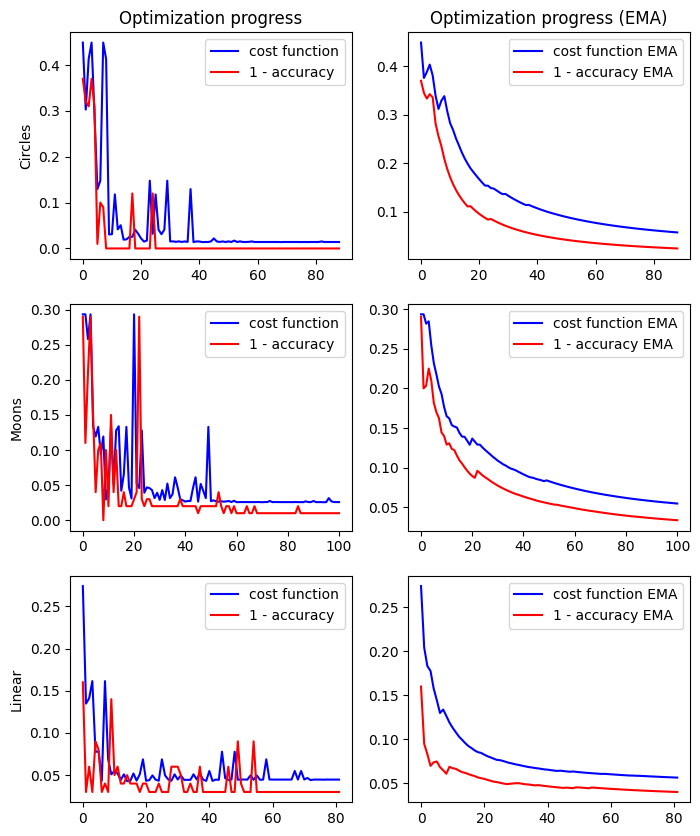

In [6]:
# Plotting the progress
figure = plt.figure(figsize=(8, 10))
titles = ["Circles", "Moons", "Linear"]


for i in range(len(names)):
    ax1 = plt.subplot(len(names), 2, i*2+1)
    ypoints = read_data(file_path, names[i]+'_cost_nb')
    zpoints = read_data(file_path, names[i]+'_accuracy_nb')
    xpoints = np.arange(ypoints.shape[0])
    ax1.plot(xpoints, ypoints, color = 'b',label = 'cost function') 
    ax1.plot(xpoints, zpoints, color = 'r', label = '1 - accuracy')
    ax1.set_ylabel(titles[i])
    if i == 0:
        ax1.set_title("Optimization progress")
    plt.legend(loc="upper right")

    y_av = moving_avg(ypoints)
    z_av = moving_avg(zpoints)


    ax2 = plt.subplot(len(names), 2, i*2+2)
    ax2.plot(xpoints, y_av, color = 'b', label = 'cost function EMA')
    ax2.plot(xpoints, z_av, color = 'r', label = '1 - accuracy EMA')
    if i == 0:
        ax2.set_title("Optimization progress (EMA)")
    plt.legend(loc="upper right")

plt.show()